In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library(ggplot2)

# Prueba de repetibilidad

In [3]:
ensamble = read.table("datosCamioneras_Repetibilidad.txt", header = TRUE)

In [4]:
str(ensamble)
attach(ensamble)

'data.frame':	12 obs. of  2 variables:
 $ Indicación: int  25390 25390 25390 25400 25400 25390 25400 25400 25400 25400 ...
 $ Operario  : chr  "Joshua" "Joshua" "Joshua" "Mauricio" ...


In [5]:
Oper <- factor(Operario)

Df Sum Sq   Mean Sq  F value  Pr(>F)    
Oper      3  166.6667 55.55556 3.333333 0.07696732
Residuals 8  133.3333 16.66667       NA         NA

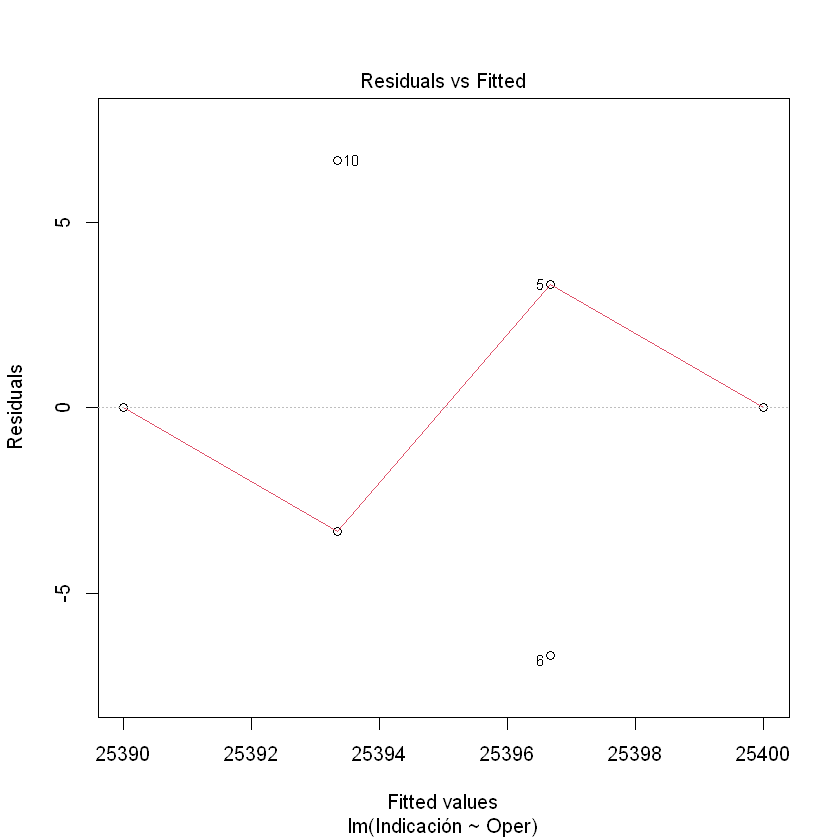

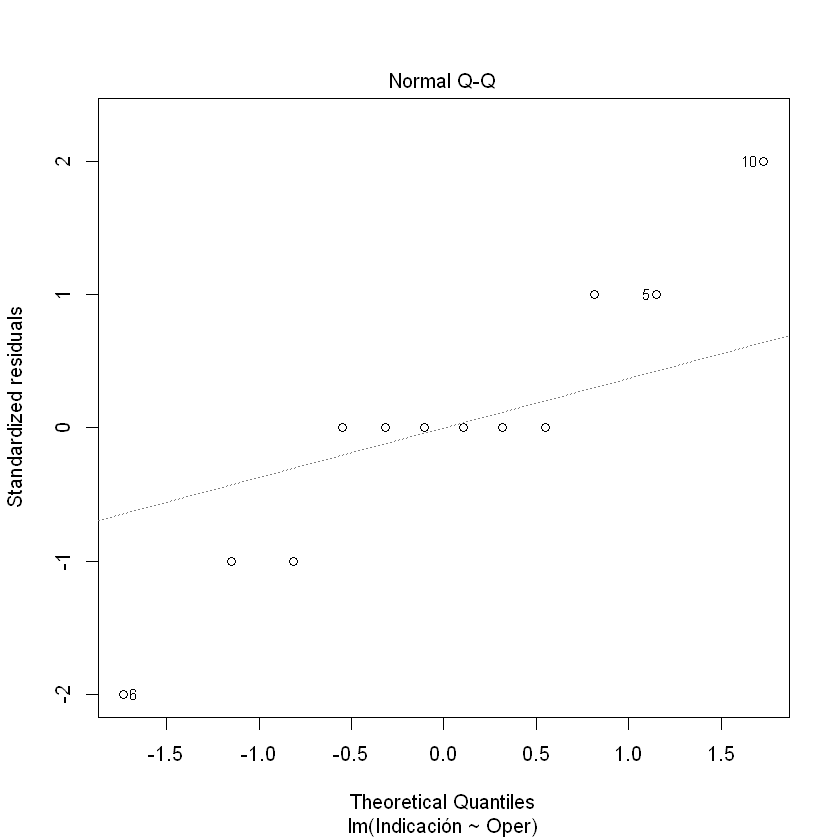

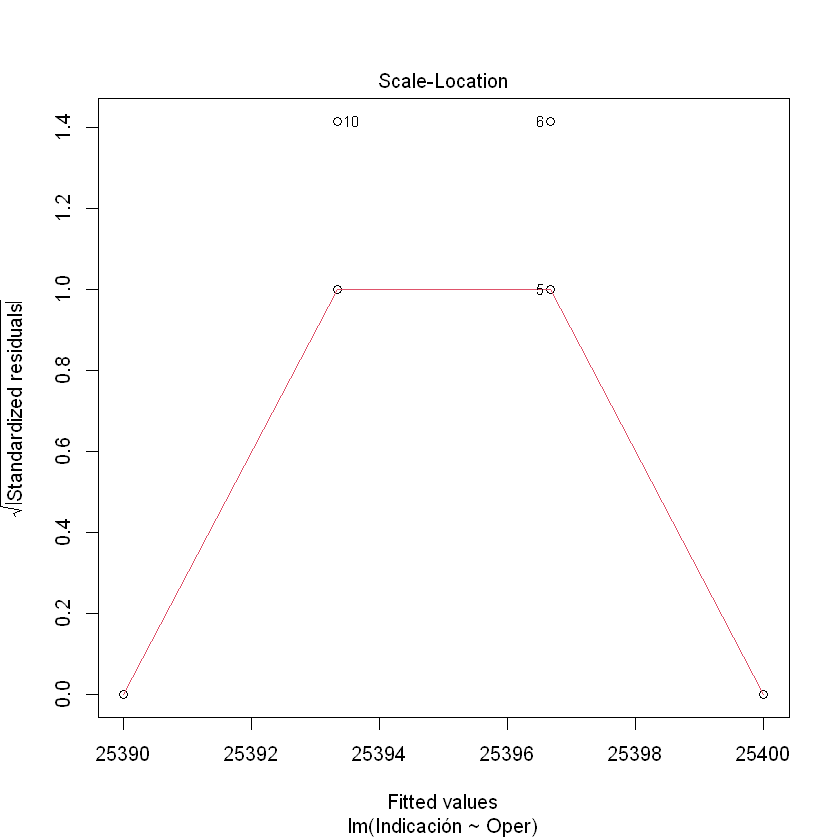

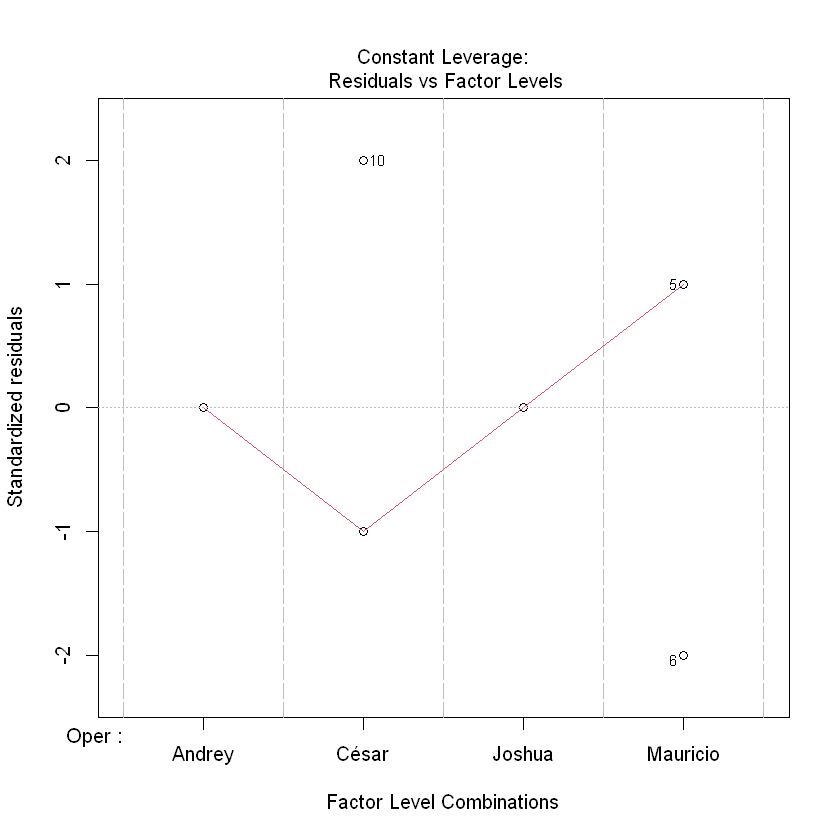

In [6]:
ensamble.lm = lm(Indicación ~ Oper)
anova(ensamble.lm)
# summary(ensamble.lm)
plot(ensamble.lm)

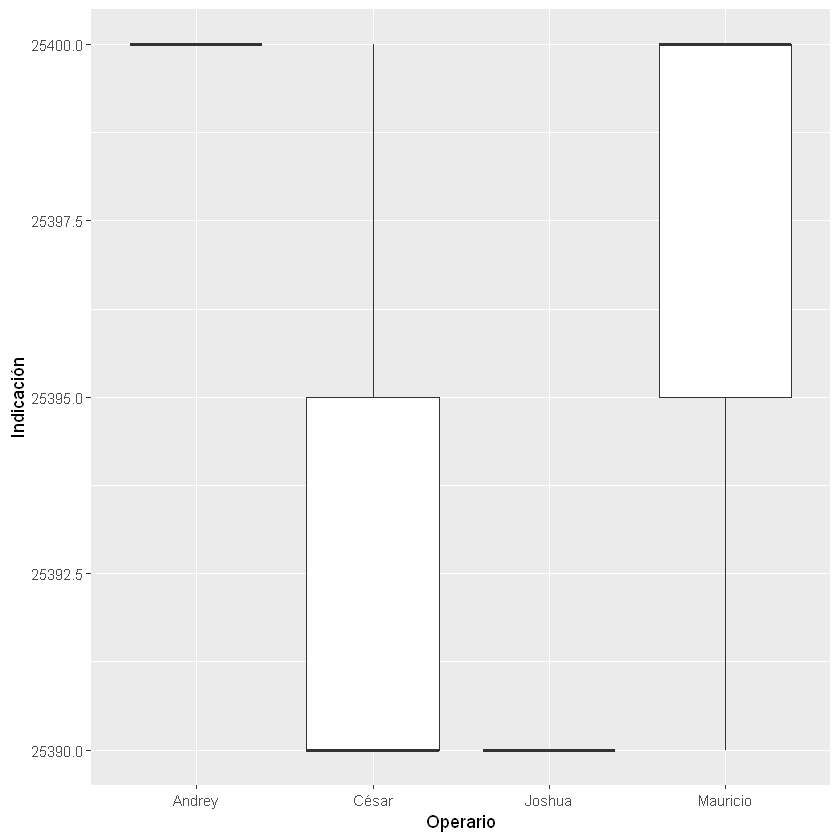

In [7]:
ggplot(ensamble, aes(x=Operario, y=Indicación)) + geom_boxplot()

In [8]:
detach(ensamble)

# Prueba de Linealidad

In [9]:
ensamble = read.table("datosCamioneras_Linealidad.txt", header = TRUE)

In [10]:
ensamble$Error=ensamble$Indicación-ensamble$Punto

In [11]:
str(ensamble)
attach(ensamble)

'data.frame':	40 obs. of  4 variables:
 $ Indicación: int  1000 1990 3990 5990 9990 19990 29980 39980 49970 1000 ...
 $ Operario  : chr  "Joshua" "Joshua" "Joshua" "Joshua" ...
 $ Punto     : int  1000 2000 4000 6000 10000 20000 30000 40000 50000 1000 ...
 $ Error     : int  0 -10 -10 -10 -10 -10 -20 -20 -30 0 ...


In [12]:
Oper <- factor(Operario)
Punto=factor(Punto)

Df Sum Sq    Mean Sq    F value     Pr(>F)      
Oper        3    7.5000    2.50000   0.2129302 8.867642e-01
Indicación  1 2259.0671 2259.06713 192.4094050 8.670174e-16
Residuals  35  410.9329   11.74094          NA           NA

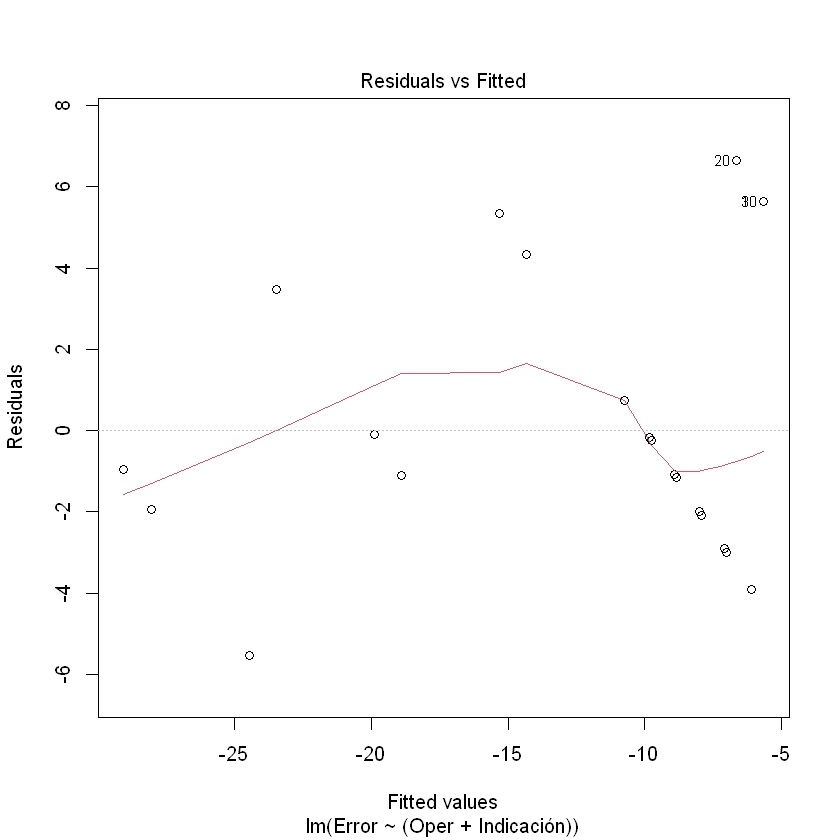

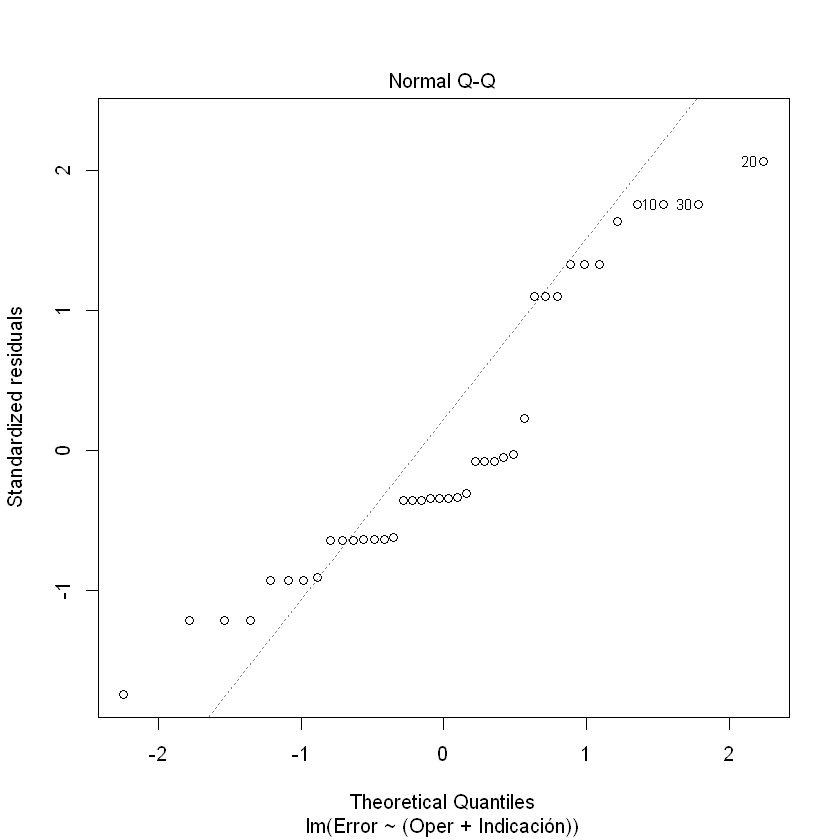

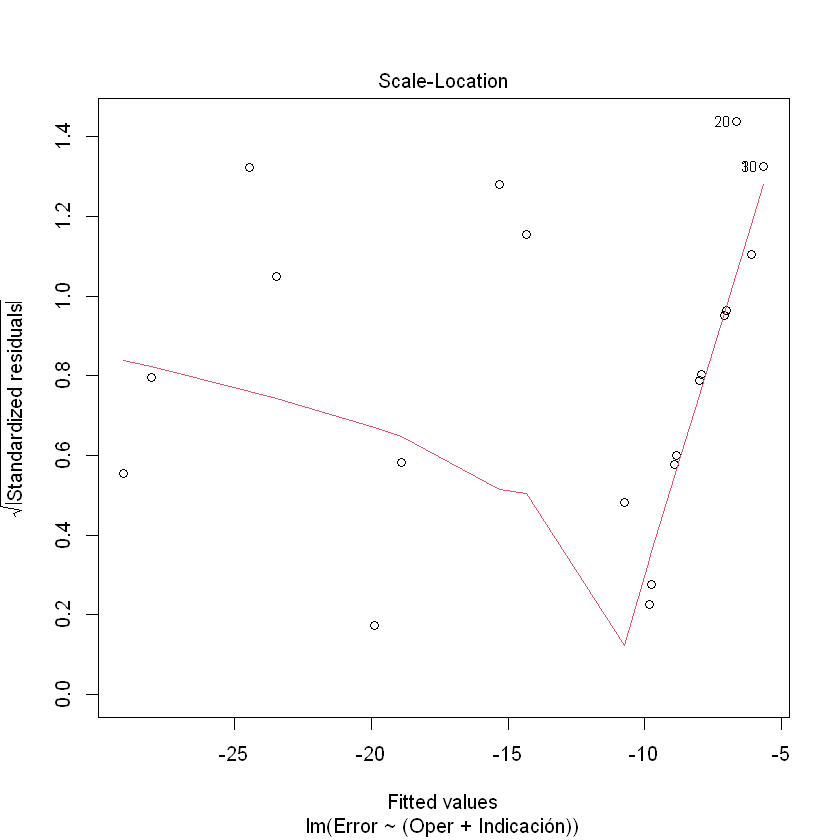

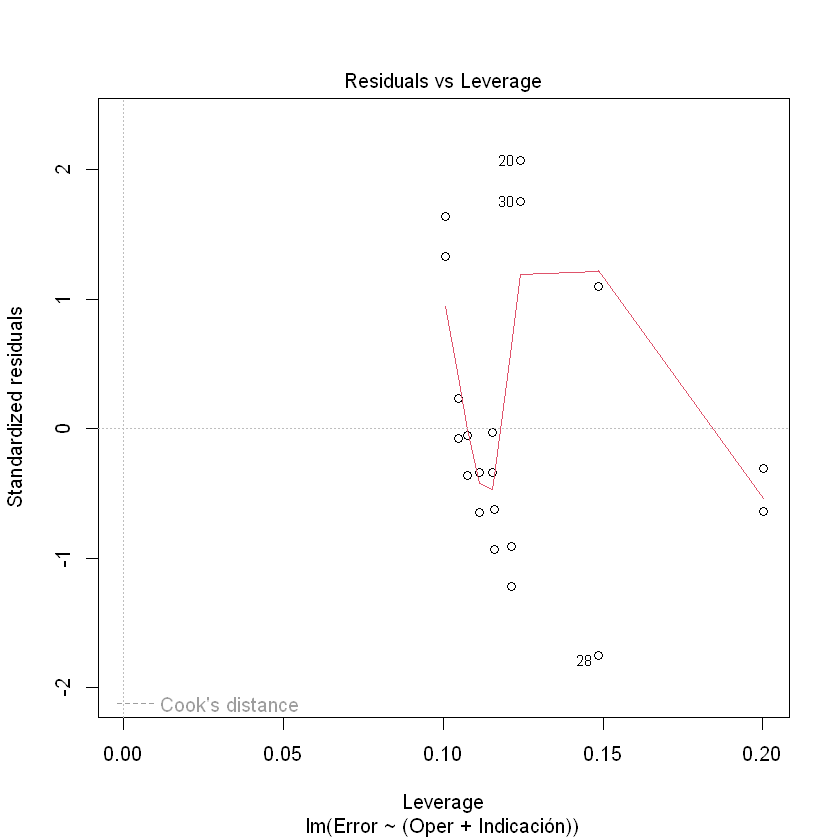

In [13]:
ensamble.lm = lm(Error ~ (Oper+Indicación))
anova(ensamble.lm)
# summary(ensamble.lm)
plot(ensamble.lm)

In [14]:
joshua=ensamble[ensamble$Operario=="Joshua",]
mauricio=ensamble[ensamble$Operario=="Mauricio",]
césar=ensamble[ensamble$Operario=="César",]
andrey=ensamble[ensamble$Operario=="Andrey",]

In [15]:
joshua_lm=lm(Error~Indicación,joshua)
summary(joshua_lm)$r.squared

[1] 0.8419516

In [16]:
césar_lm=lm(Error~Indicación,césar)
summary(césar_lm)$r.squared

[1] 0.8419516

In [17]:
mau_lm=lm(Error~Indicación,mauricio)
summary(mau_lm)$r.squared

[1] 0.8419516

In [18]:
andrey_lm=lm(Error~Indicación,andrey)
summary(andrey_lm)$r.squared

[1] 0.8724898

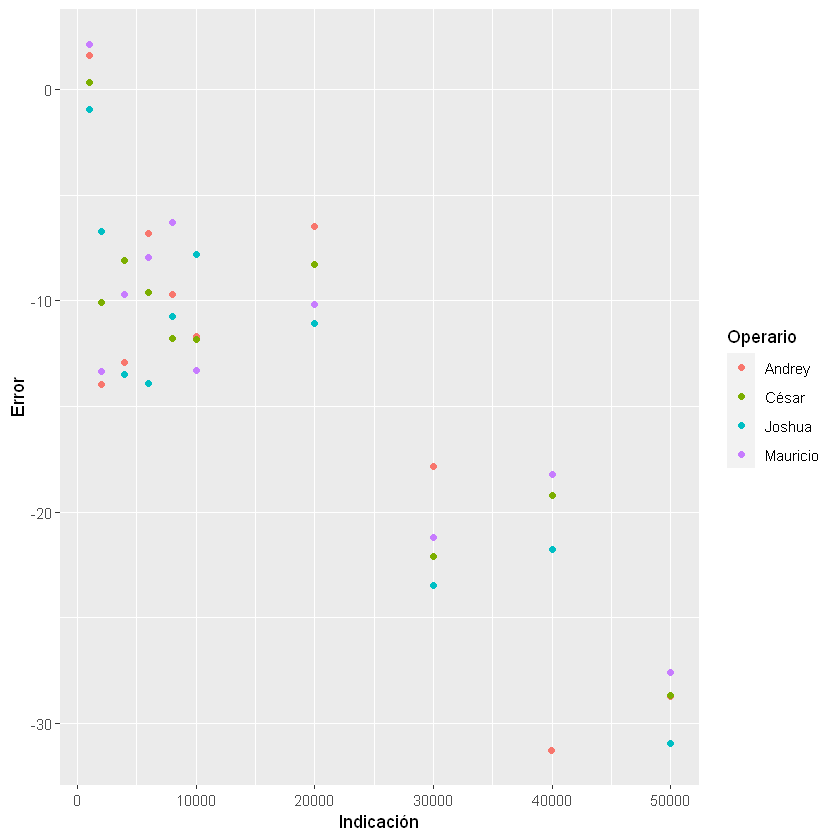

In [19]:
ggplot(ensamble,aes(Indicación,Error,colour=Operario))+geom_jitter()

`geom_smooth()` using formula = 'y ~ x'


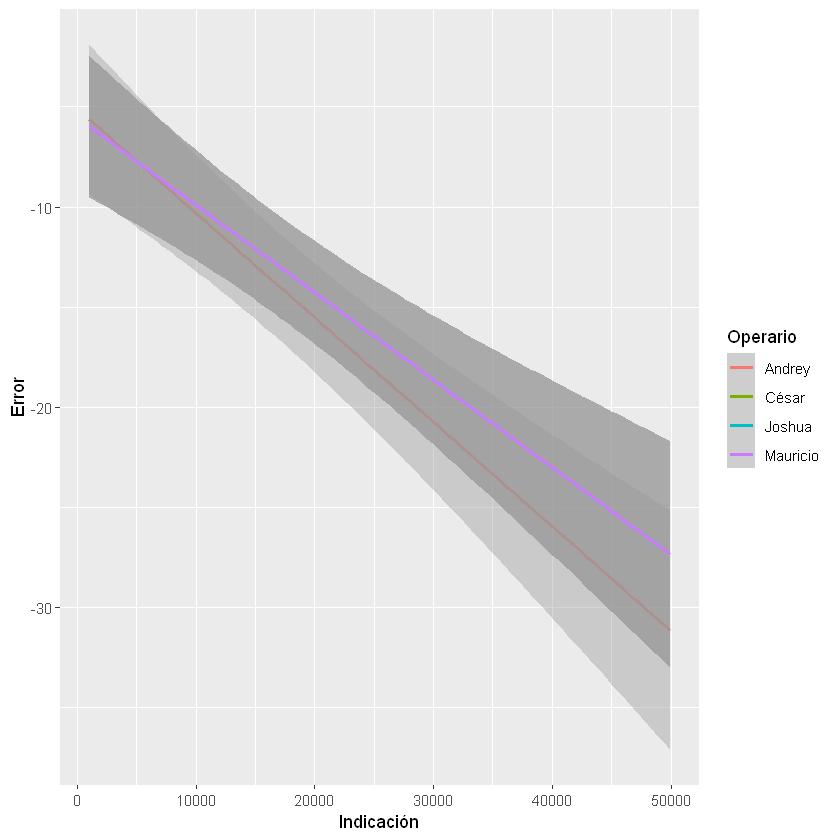

In [20]:
ggplot(ensamble,aes(Indicación,Error,colour=Operario))+geom_smooth(method=lm)

In [21]:
detach(ensamble)

# Prueba de Excentricidad

In [22]:
ensamble = read.table("datosCamioneras_Excentricidad.txt", header = TRUE)

In [23]:
str(ensamble)
attach(ensamble)

'data.frame':	32 obs. of  3 variables:
 $ Indicación: int  7280 7280 7280 7280 7280 7280 7280 7280 7290 7290 ...
 $ Operario  : chr  "Joshua" "Joshua" "Joshua" "Joshua" ...
 $ Sentido   : int  1 1 1 2 2 2 1 1 1 1 ...


In [24]:
Oper <- factor(Operario)
Sent=factor(Sentido)

Df Sum Sq   Mean Sq  F value    Pr(>F)   
Oper       3   84.375 28.12500 0.57446809 0.6373292
Sent       1    3.125  3.12500 0.06382979 0.8026934
Oper:Sent  3    9.375  3.12500 0.06382979 0.9784511
Residuals 24 1175.000 48.95833         NA        NA

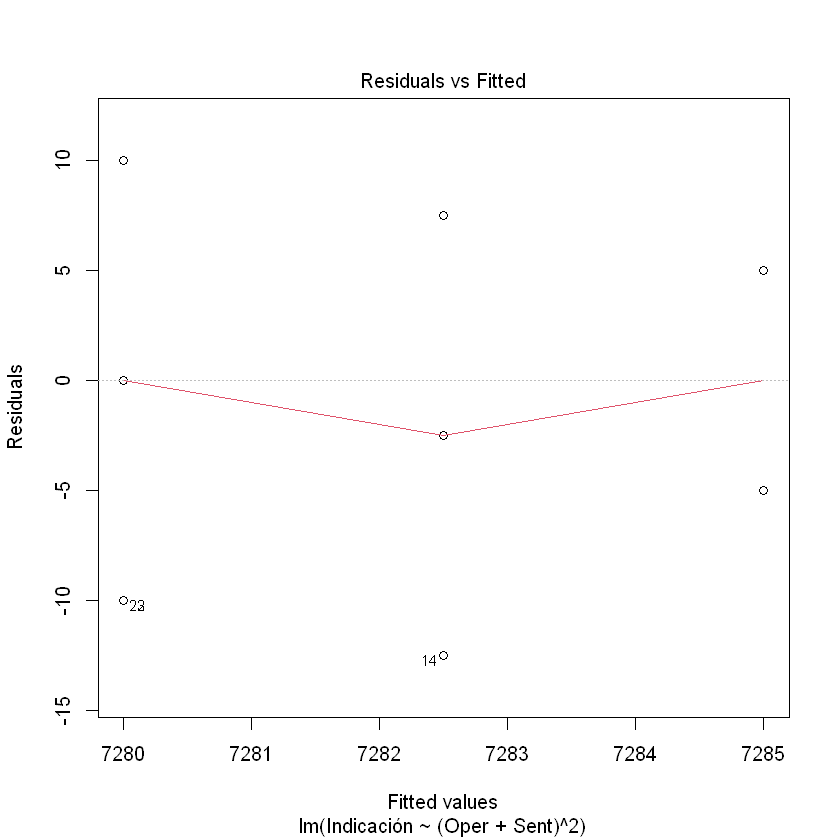

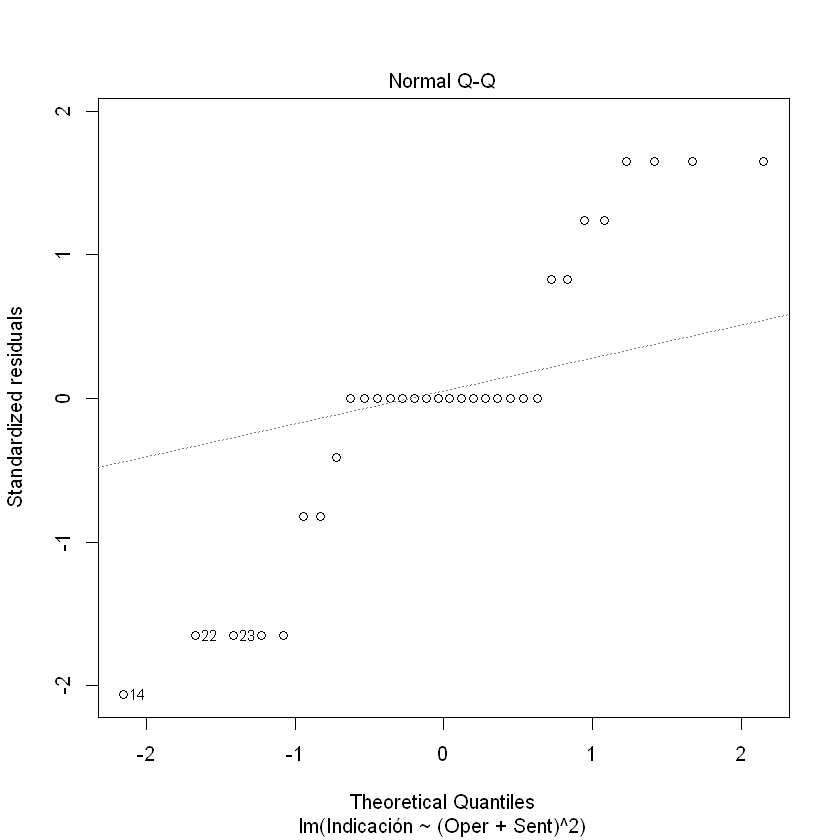

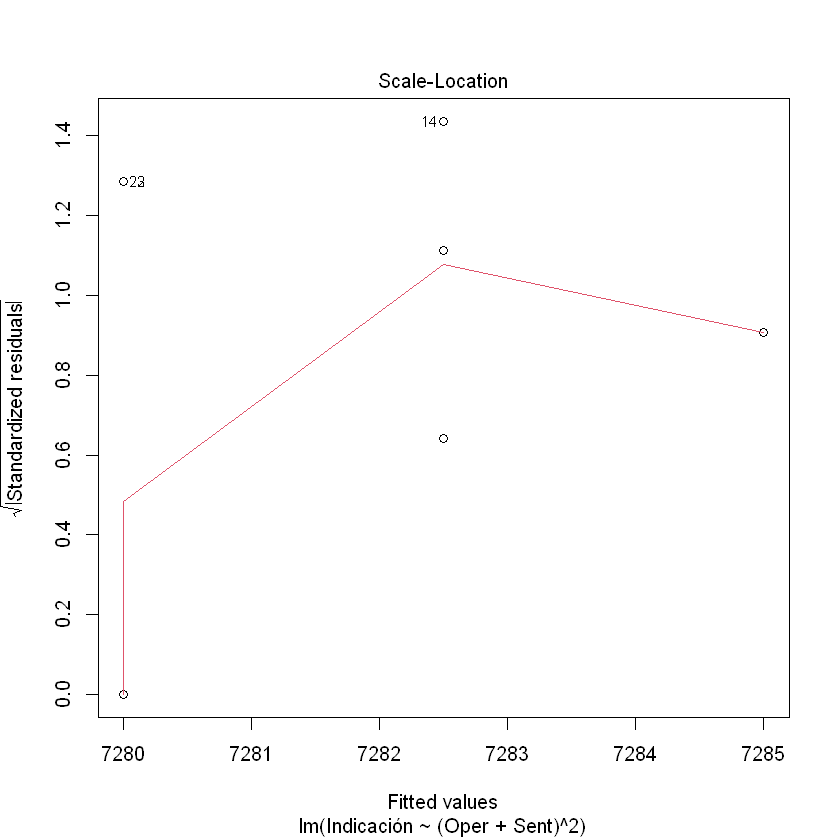

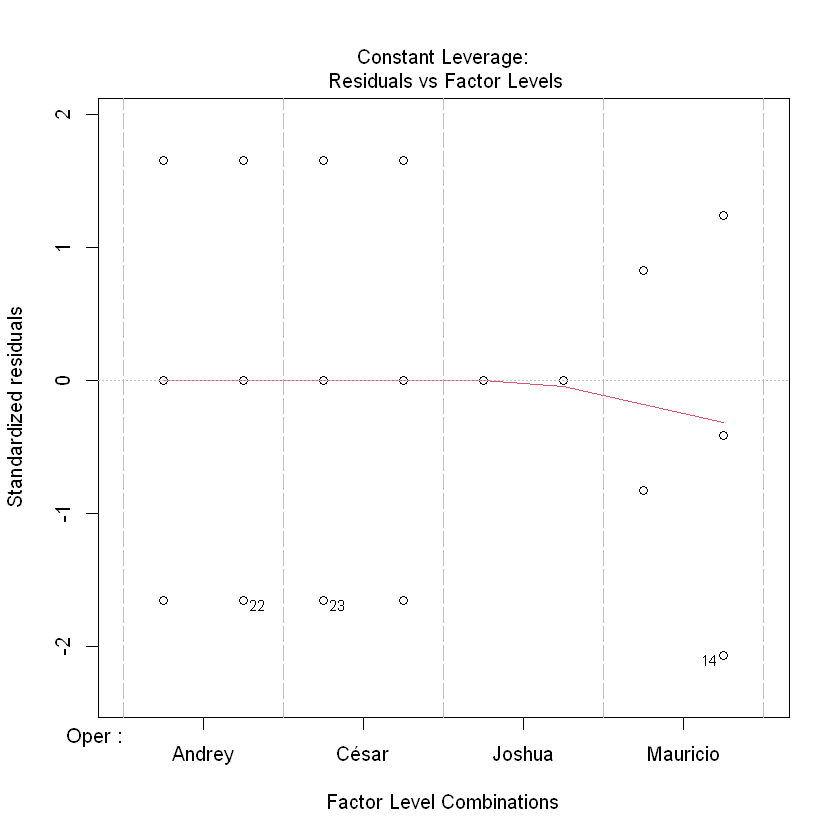

In [25]:
ensamble.lm = lm(Indicación ~ (Oper+Sent)**2)
anova(ensamble.lm)
# summary(ensamble.lm)
plot(ensamble.lm)

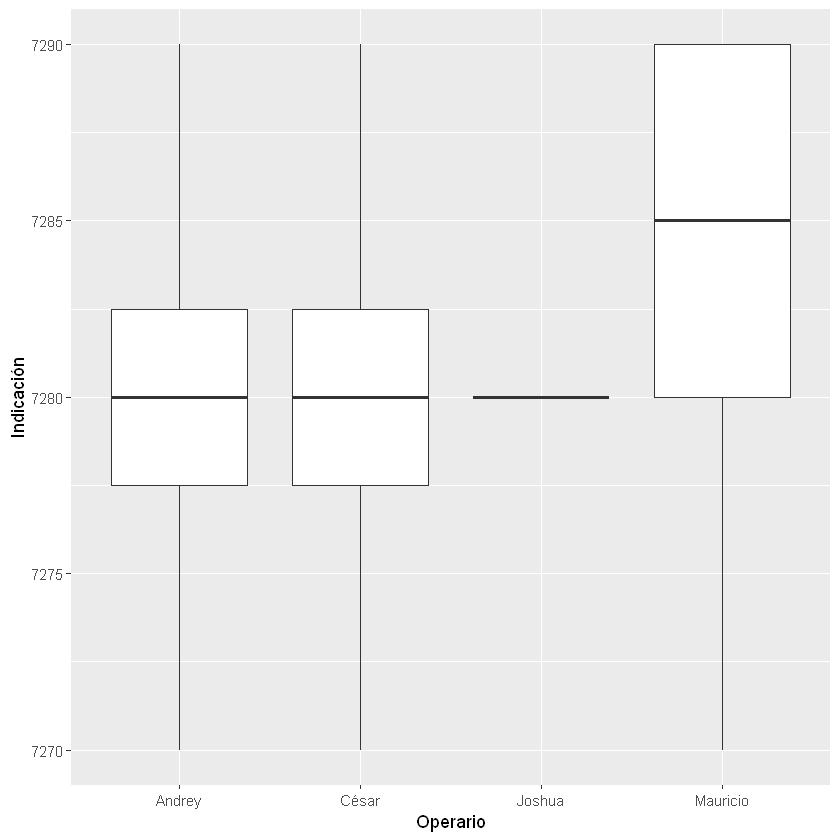

In [26]:
ggplot(ensamble, aes(x=Operario, y=Indicación)) + geom_boxplot()

In [27]:
detach(ensamble)